In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.preprocessing.sequence import pad_sequences
import re
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM ,RNN, GRU
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
test = open("/content/gdrive/My Drive/test.txt",'r')
train = open("/content/gdrive/My Drive/train.txt",'r')

In [0]:
xtest = test.readlines()
xtrain = train.readlines()

In [0]:
def clean_sentence(sentence):
  TAG_RE = re.compile(r'<[^>]+>')
  sentence = TAG_RE.sub(' ',sentence)
  sentence = re.sub('[^a-zA-Z]', ' ', sentence)
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
  sentence = re.sub(r'\s+', ' ', sentence)
  sentence = sentence.lower()
  return sentence

In [28]:
xtest = [clean_sentence(sen) for sen in xtest]
xtrain = [clean_sentence(sen) for sen in xtrain]
print(len(xtest),len(xtrain))

25000 25000


In [0]:
target = [1 if i<12500 else 0 for i in range(25000)]
target = np.array(target)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(xtrain)

xtrain = tokenizer.texts_to_sequences(xtrain)
xtest = tokenizer.texts_to_sequences(xtest)

In [0]:
vocab_size = len(tokenizer.word_index) + 1
maxlen = 200

xtrain = pad_sequences(xtrain, padding='post', maxlen=maxlen)
xtest = pad_sequences(xtest, padding='post', maxlen=maxlen)

#MODEL4

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 395s 20ms/sample - loss: 0.6747 - acc: 0.6275 - val_loss: 0.7491 - val_acc: 0.3018
Epoch 2/5
20000/20000 [==============================] - 392s 20ms/sample - loss: 0.4964 - acc: 0.7435 - val_loss: 0.7935 - val_acc: 0.5254
Epoch 3/5
20000/20000 [==============================] - 391s 20ms/sample - loss: 0.3249 - acc: 0.8632 - val_loss: 0.5180 - val_acc: 0.7794
Epoch 4/5
20000/20000 [==============================] - 391s 20ms/sample - loss: 0.2481 - acc: 0.9022 - val_loss: 0.3396 - val_acc: 0.8492
Epoch 5/5
20000/20000 [==============================] - 391s 20ms/sample - loss: 0.1986 - acc: 0.9234 - val_loss: 0.5178 - val_acc: 0.7806


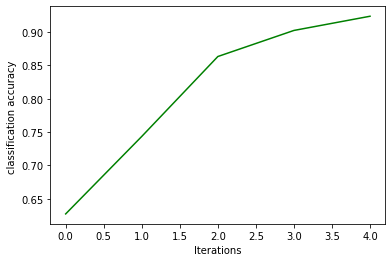

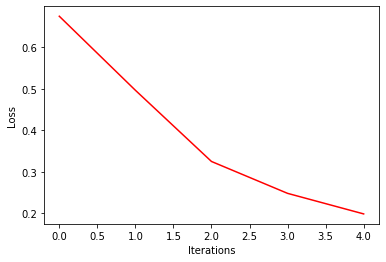

25000/25000 - 117s - loss: 0.3544 - acc: 0.8522
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
gru_2 (GRU)                  (None, None, 200)         197400    
_________________________________________________________________
gru_3 (GRU)                  (None, 200)               240600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 1,718,201
Trainable params: 1,718,201
Non-trainable params: 0
_________________________________________________________________
None
test Accuracy 0.8521999716758728


In [32]:
model4 = models.Sequential()
model4.add(layers.Embedding(10000,128))
model4.add(layers.GRU(units=200,return_sequences=True, activation='relu'))
model4.add(layers.GRU(units=200,activation='relu'))
model4.add(layers.Dense(1,activation='sigmoid'))
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model4.fit(xtrain, target, epochs=5, validation_split = 0.2 ,shuffle=True)

plt.ylabel('classification accuracy ')
plt.xlabel('Iterations')
plt.plot(history.history['acc'],'g')
plt.show()

plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.plot(history.history['loss'],'r')
plt.show()
test_loss, test_acc = model4.evaluate(xtest, target, verbose=2)

print(model4.summary())
print(f'test Accuracy {test_acc}')
